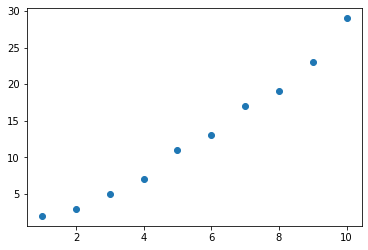

In [2]:
import matplotlib.pyplot as plt

class InteractivePlot:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.selected_points = []

        self.fig, self.ax = plt.subplots()
        self.line, = self.ax.plot(x, y, 'o', picker=5)  # 'picker=5' makes the points selectable

        self.cid = self.fig.canvas.mpl_connect('pick_event', self.onpick)
        self.cid2 = self.fig.canvas.mpl_connect('button_press_event', self.onpress)

    def onpick(self, event):
        if event.artist != self.line:
            return

        ind = event.ind
        x_values = self.x[ind]
        y_values = self.y[ind]

        for i in range(len(ind)):
            print(f'Selected point: x={x_values[i]}, y={y_values[i]}')
            self.selected_points.append((x_values[i], y_values[i]))

    def onpress(self, event):
        if event.dblclick:
            print("All selected points:")
            for point in self.selected_points:
                print(f'x={point[0]}, y={point[1]}')
            self.selected_points.clear()  # Clear the selected points after printing

    def show(self):
        plt.show()

# Sample data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

# Create and show interactive plot
plot = InteractivePlot(x, y)
plot.show()


In [3]:
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np

class InteractivePlot:
    def __init__(self, root, x, y):
        self.root = root
        self.x = x
        self.y = y
        self.selected_points = []

        self.figure = Figure(figsize=(6, 4), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.line, = self.ax.plot(x, y, 'o', picker=5)  # 'picker=5' makes the points selectable

        self.canvas = FigureCanvasTkAgg(self.figure, master=root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        self.canvas.mpl_connect('pick_event', self.onpick)
        self.canvas.mpl_connect('button_press_event', self.onpress)

    def onpick(self, event):
        if event.artist != self.line:
            return

        ind = event.ind
        x_values = self.x[ind]
        y_values = self.y[ind]

        for i in range(len(ind)):
            print(f'Selected point: x={x_values[i]}, y={y_values[i]}')
            self.selected_points.append((x_values[i], y_values[i]))

    def onpress(self, event):
        if event.dblclick:
            print("All selected points:")
            for point in self.selected_points:
                print(f'x={point[0]}, y={point[1]}')
            self.selected_points.clear()  # Clear the selected points after printing

def main():
    root = tk.Tk()
    root.title("Interactive Plot with Tkinter")

    x = np.arange(1, 11)
    y = np.array([2, 3, 5, 7, 11, 13, 17, 19, 23, 29])

    plot = InteractivePlot(root, x, y)
    
    root.mainloop()

if __name__ == "__main__":
    main()


Selected point: x=1, y=2
Selected point: x=2, y=3
Selected point: x=2, y=3
All selected points:
x=1, y=2
x=2, y=3
x=2, y=3
Selected point: x=3, y=5
Selected point: x=3, y=5
All selected points:
x=3, y=5
x=3, y=5
Selected point: x=4, y=7
Selected point: x=4, y=7
All selected points:
x=4, y=7
x=4, y=7
